# 1 Data Cleaning no impute (incomplete)

# 0) Import Modules

In [18]:
import os
from zipfile import ZipFile

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 1) Load Data

In [19]:
os.chdir("/Users/anhthyngo/ds-ga1001-master/")

In [20]:
cwd = os.getcwd()
datadir = '/'.join(cwd.split('/')) + '/data/'
listings = datadir + 'listings.csv.zip'
print(listings)

/Users/anhthyngo/ds-ga1001-master/data/listings.csv.zip


In [21]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
zf = ZipFile(listings) 
data = pd.read_csv(zf.open("listings.csv"), parse_dates=['host_since', 'first_review', 'last_review'], low_memory=False)
data.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3647,https://www.airbnb.com/rooms/3647,20190912153101,2019-09-13,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,NaN,NaN,NaN,Upon arrival please have a legibile copy of yo...,NaN,NaN,https://a0.muscache.com/im/pictures/838341/9b3...,NaN,4632,https://www.airbnb.com/users/show/4632,Elisabeth,2008-11-25,"New York, New York, United States",Make Up Artist National/ (Website hidden by Ai...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/users/4632/profile_...,https://a0.muscache.com/im/users/4632/profile_...,Harlem,1.0,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,"New York, NY, United States",Harlem,Harlem,Manhattan,New York,NY,10027,New York,"New York, NY",US,United States,40.80902,-73.94190,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",NaN,$150.00,NaN,NaN,$200.00,$75.00,2,$20.00,3,7,3,3,7,7,3.0,7.0,37 months ago,t,30,60,90,365,2019-09-13,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
1,3831,https://www.airbnb.com/rooms/3831,20190912153101,2019-09-13,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,NaN,B52 bus for a 10-minute ride to downtown Brook...,You will have exclusive use of and access to: ...,"We'll be around, but since you have the top fl...",Smoking - outside please; pets allowed but ple...,NaN,NaN,https://a0.muscache.com/im/pictures/e49999c2-9...,NaN,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back bi-coastal actor/professor/attorney.,within an hour,92%,NaN,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Brooklyn, NY, United States",Brooklyn,Clinton Hill,Brooklyn,Brooklyn,NY,11238,New York,"Brooklyn, NY",US,United States,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,W

# 2) Cleaning Data

### 2.1 Drop irrelevant columns

In [22]:
data = data.drop(["id","market","is_location_exact","listing_url","scrape_id","last_scraped","name","summary","space","description",\
                  "experiences_offered","neighborhood_overview","notes","transit","access","interaction", \
                 "house_rules","thumbnail_url","medium_url","picture_url","xl_picture_url","host_id","host_url",\
                  "host_name","host_about","host_thumbnail_url","host_picture_url","calendar_last_scraped"\
                  ,"country","country_code","state","host_since","first_review","last_review","host_location",\
                  "host_response_time","host_neighbourhood","street" ,"neighbourhood","zipcode"],axis = 1)
data.head(2)

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,city,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0%,NaN,f,1.0,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,Harlem,Manhattan,New York,"New York, NY",40.80902,-73.94190,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",NaN,$150.00,NaN,NaN,$200.00,$75.00,2,$20.00,3,7,3,3,7,7,3.0,7.0,37 months ago,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
1,92%,NaN,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Clinton Hill,Brooklyn,Brooklyn,"Brooklyn, NY",40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,$89.00,$575.00,"$2,100.00",$500.00,NaN,1,$0.00,1,730,1,1,730,730,1.0,730.0,3 days ago,t,1,3,8,192,279,67,90.0,9.0,9.0,10.0,9.0,10.0,9.0,f,NaN,NaN,f,f,moderate,f,f,1,1,0,0,4.62


In [23]:
print("There are",data.shape[0],"rows and", data.shape[1],"columns.")

There are 48377 rows and 66 columns.


In [24]:
def plot_hist(n, titles, ranges):
    for i in range(n):
        fig, ax = plt.subplots(figsize=(11, 6))
        ax = sns.distplot(ranges[i],bins=50, kde = False, color = 'maroon')
        plt.title(titles[i])
        plt.xlabel("Daily Listing Price in Dollars")
        plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

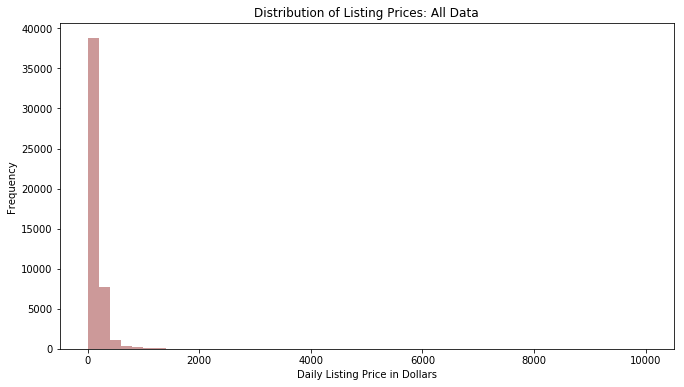

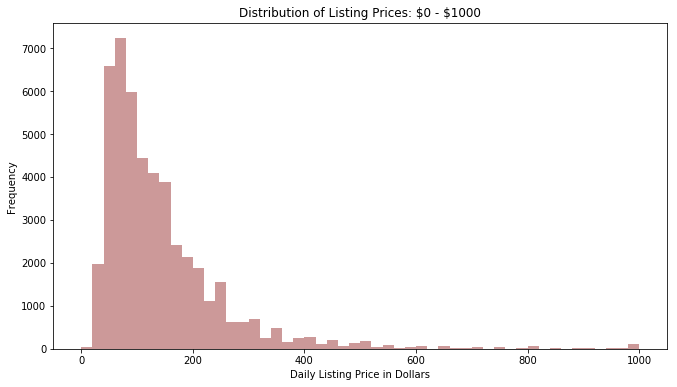

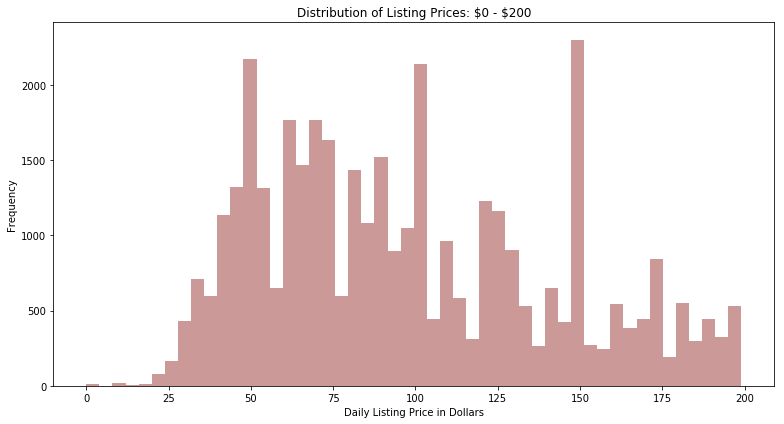

In [25]:
prices = data['price'].apply(lambda s: float(s[1:].replace(',','')))

plot_hist(3, ['Distribution of Listing Prices: All Data', 'Distribution of Listing Prices: \$0 - \$1000', 
               'Distribution of Listing Prices: \$0 - \$200'], [prices, prices[prices <= 1000], prices[prices < 200]])

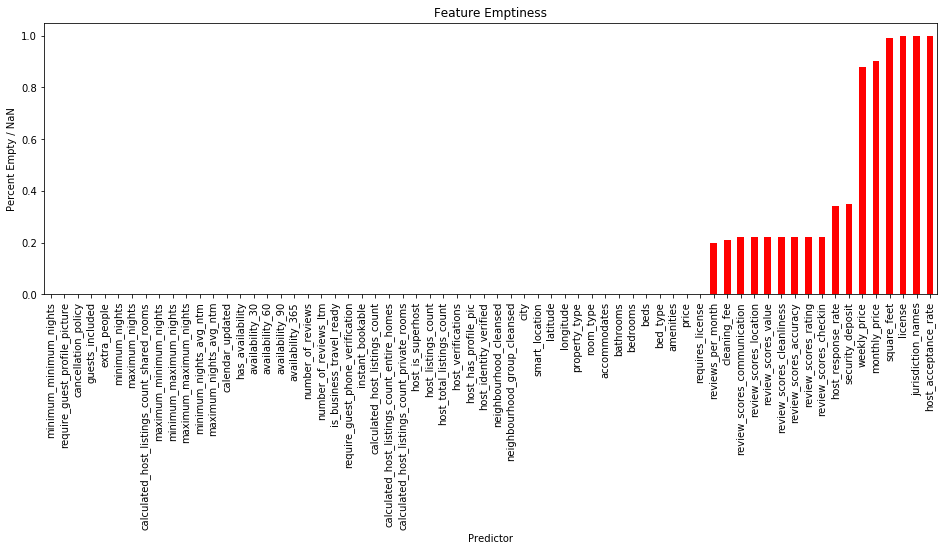

In [26]:
def percent_empty(df):
    
    bools = df.isnull().tolist()
    percent_empty = float(bools.count(True)) / float(len(bools))
    
    return percent_empty, float(bools.count(True))

# Store emptiness for all features
emptiness = []

missing_columns = []

# Get emptiness for all features
for i in range(0, data.shape[1]):
    p, n = percent_empty(data.iloc[:,i])
    if n > 0:
        missing_columns.append(data.columns.values[i])
    emptiness.append(round((p), 2))
    
empty_dict = dict(zip(data.columns.values.tolist(), emptiness))

# Plot emptiness graph
empty = pd.DataFrame.from_dict(empty_dict, orient = 'index').sort_values(by=0)
ax = empty.plot(kind = 'bar', color='red', figsize = (16, 5))
ax.set_xlabel('Predictor')
ax.set_ylabel('Percent Empty / NaN')
ax.set_title('Feature Emptiness')
ax.legend_.remove()

plt.show()

### 2.2 Handle Missing Values
We will check dataset for missing values. If a column has more than 50% of values missing, we will drop the column.

In [27]:
for col in list(data.columns):
    count_miss_ratio = pd.isnull(data[col]).sum()/len(data)*100
    if count_miss_ratio > 50:
        print("%0.2f %% observations missing for %s." % (float(count_miss_ratio),col))
        data = data.drop([col], axis=1)
        

100.00 % observations missing for host_acceptance_rate.
99.22 % observations missing for square_feet.
88.11 % observations missing for weekly_price.
89.66 % observations missing for monthly_price.
99.96 % observations missing for license.
99.98 % observations missing for jurisdiction_names.


In [28]:
print("There are",data.shape[0],"rows and", data.shape[1],"columns.")

There are 48377 rows and 60 columns.


If there are only a few missing observations for a specific feature, we will just ignore the missing entry data.

In [29]:
for col in list(data.columns):
    count_miss_ratio = pd.isnull(data[col]).sum()/len(data)*100
    #if count_miss_ratio != 0 and count_miss_ratio < 1:
    if count_miss_ratio > 0:
        print("%0.2f %% observations missing for %s." % (float(count_miss_ratio),col))
    

33.93 % observations missing for host_response_rate.
0.04 % observations missing for host_is_superhost.
0.04 % observations missing for host_listings_count.
0.04 % observations missing for host_total_listings_count.
0.04 % observations missing for host_has_profile_pic.
0.04 % observations missing for host_identity_verified.
0.14 % observations missing for city.
0.10 % observations missing for bathrooms.
0.08 % observations missing for bedrooms.
0.07 % observations missing for beds.
34.98 % observations missing for security_deposit.
21.15 % observations missing for cleaning_fee.
21.83 % observations missing for review_scores_rating.
21.91 % observations missing for review_scores_accuracy.
21.88 % observations missing for review_scores_cleanliness.
21.94 % observations missing for review_scores_checkin.
21.90 % observations missing for review_scores_communication.
21.95 % observations missing for review_scores_location.
21.95 % observations missing for review_scores_value.
19.95 % observ

In [30]:
for col in list(data.columns):
    null_ratio = pd.isnull(data[col]).sum()/len(data)*100
    if null_ratio != 0 and null_ratio < 1:
    #if count_miss_ratio:
        print("%0.2f %% observations missing for %s." % (float(null_ratio),col))
        data = data[pd.notnull(data[col])]

0.04 % observations missing for host_is_superhost.
0.14 % observations missing for city.
0.10 % observations missing for bathrooms.
0.08 % observations missing for bedrooms.
0.04 % observations missing for beds.


In [31]:
print("There are",data.shape[0],"rows and", data.shape[1],"columns.")

There are 48182 rows and 60 columns.


The rest of these features are numerical and we will impute them later.

In [32]:
for col in list(data.columns):
    null_ratio = pd.isnull(data[col]).sum()/len(data)*100
    if null_ratio != 0 and null_ratio > 1:
        print("%0.2f %% observations missing for %s." % (float(null_ratio),col))
    

33.89 % observations missing for host_response_rate.
34.92 % observations missing for security_deposit.
21.11 % observations missing for cleaning_fee.
21.78 % observations missing for review_scores_rating.
21.86 % observations missing for review_scores_accuracy.
21.83 % observations missing for review_scores_cleanliness.
21.90 % observations missing for review_scores_checkin.
21.86 % observations missing for review_scores_communication.
21.91 % observations missing for review_scores_location.
21.90 % observations missing for review_scores_value.
19.91 % observations missing for reviews_per_month.


### 2.3 Convert Numeric String features
Currency features are currently strings, we will convert them to floats and we will impute them with the median for currency features with null values. We pick the median because `security_deposit` and `cleaning_fee` are extremely left-skewed and therefore median will be a better choice to deal with outliers.

In [33]:
money_attributes = ['extra_people', 'cleaning_fee', 'security_deposit', 'price']
money_floats = data[money_attributes].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float)

money_floats.head()

,extra_people,cleaning_fee,security_deposit,price
0,20.0,75.0,200.0,150.0
1,0.0,NaN,500.0,89.0
3,100.0,125.0,300.0,200.0
5,12.0,15.0,NaN,79.0
6,0.0,NaN,NaN,79.0


In [34]:
#money_floats = money_floats.fillna(money_floats[['cleaning_fee', 'security_deposit']].mean())
data = data.drop(columns=['extra_people', 'cleaning_fee', 'security_deposit', 'price'])
data = pd.concat([data,money_floats],axis = 1)
#data.head()


### 2.4 Convert Binary Columns

Binary columns are labeled as either "True" or "False". Let's change them to the dummy values 1 and 0.

In [35]:
bool_attributes = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', \
                    'has_availability', 'requires_license', \
                   'instant_bookable', 'is_business_travel_ready', 'require_guest_profile_picture', \
                   'require_guest_phone_verification']
def bool_to_dummy(boo):
    boo = boo.replace('f', 0);
    boo = boo.replace('t', 1);
    return boo

data_bool_dummy = data[bool_attributes].apply(lambda col: bool_to_dummy(col))
data = data.drop(columns=['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', \
                    'has_availability', 'requires_license', \
                   'instant_bookable', 'is_business_travel_ready', 'require_guest_profile_picture', \
                   'require_guest_phone_verification'])
data = pd.concat([data,data_bool_dummy],axis = 1)

data.head(2)

,host_response_rate,host_listings_count,host_total_listings_count,host_verifications,neighbourhood_cleansed,neighbourhood_group_cleansed,city,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,extra_people,cleaning_fee,security_deposit,price,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification
0,0%,1.0,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",Harlem,Manhattan,New York,"New York, NY",40.80902,-73.94190,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",2,3,7,3,3,7,7,3.0,7.0,37 months ago,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict_14_with_grace_period,1,0,1,0,NaN,20.0,75.0,200.0,150.0,0,1,1,1,0,0,0,1,1
1,92%,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",Clinton Hill,Brooklyn,Brooklyn,"Brooklyn, NY",40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1,1,730,1,1,730,730,1.0,730.0,3 days ago,1,3,8,192,279,67,90.0,9.0,9.0,10.0,9.0,10.0,9.0,moderate,1,1,0,0,4.62,0.0,NaN,500.0,89.0,0,1,1,1,0,0,0,0,0


### 2.5 Convert List Columns
Some of the features are grouped into annoying lists.
For example `host_verifications` is a column grouping all verified social media accounts / other information into an array. We will extract them out and create dummy variables for each.

In [36]:
array_attributes = ['host_verifications', 'amenities']

def get_arr(arr):
    arr = arr.str.replace('[', '');
    arr = arr.str.replace(']', '');
    arr = arr.str.replace('{', '');
    arr = arr.str.replace('}', '');
    arr = arr.str.replace("'", '');
    arr = arr.str.replace('"', '');
    return arr;

listings_arr_fixed = data[array_attributes].apply(lambda col: get_arr(col))

array_dummy_arrs = [];
for col in listings_arr_fixed.columns:
    dummy_arrs = listings_arr_fixed[col].str.get_dummies(sep=',');
    dummy_arrs = dummy_arrs.add_prefix(col + '_');
    array_dummy_arrs.append(dummy_arrs);

listings_arr_fixed = pd.concat(array_dummy_arrs, axis=1)
data = pd.concat([data,listings_arr_fixed],axis = 1)
data = data.drop(columns=['host_verifications', 'amenities'])
data.head(2)

,host_response_rate,host_listings_count,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,city,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,extra_people,cleaning_fee,security_deposit,price,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,host_verifications_ facebook,host_verifications_ google,host_verifications_ government_id,host_verifications_ identity_manual,host_verifications_ jumio,host_verifications_ kba,host_verifications_ manual_offline,host_verifications_ manual_online,host_verifications_ offline_government_id,host_verifications_ phone,host_verifications_ reviews,host_verifications_ selfie,host_verifications_ sent_id,host_verifications_ sesame,host_verifications_ sesame_offline,host_verifications_ weibo,host_verifications_ work_email,host_verifications_ zhima_selfie,host_verifications_email,host_verifications_facebook,host_verifications_google,host_verifications_jumio,host_verifications_offline_government_id,host_verifications_phone,host_verifications_reviews,amenities_ toilet,amenities_24-hour check-in,amenities_Accessible-height bed,amenities_Accessible-height toilet,amenities_Air conditioning,amenities_Air purifier,amenities_BBQ grill,amenities_Baby bath,amenities_Baby monitor,amenities_Babysitter recommendations,amenities_Bathtub,amenities_Bathtub with bath chair,amenities_Beach essentials,amenities_Beachfront,amenities_Bed linens,amenities_Breakfast,amenities_Building staff,amenities_Buzzer/wireless intercom,amenities_Cable TV,amenities_Carbon monoxide detector,amenities_Cat(s),amenities_Ceiling hoist,amenities_Changing table,amenities_Children’s books and toys,amenities_Children’s dinnerware,amenities_Cleaning before checkout,amenities_Coffee maker,amenities_Cooking basics,amenities_Crib,amenities_Disabled parking spot,amenities_Dishes and silverware,amenities_Dishwasher,amenities_Dog(s),amenities_Doorman,amenities_Dryer,amenities_EV charger,amenities_Electric profiling bed,amenities_Elevator,amenities_Essentials,amenities_Ethernet connection,amenities_Extra pillows and blankets,amenities_Extra space around bed,amenities_Family/kid friendly,amenities_Fire extinguisher,amenities_Fireplace guards,amenities_Firm mattress,amenities_First aid kit,amenities_Fixed grab bars for shower,amenities_Fixed grab bars for toilet,amenities_Flat path to guest entrance,amenities_Free parking on premises,amenities_Free street parking,amenities_Full kitchen,amenities_Game console,amenities_Garden or backyard,amenities_Ground floor access,amenities_Gym,amenities_Hair dryer,amenities_Handheld shower head,amenities_Hangers,amenities_Heating,amenities_High chair,amenities_Host greets you,amenities_Hot tub,amenities_Hot water,amenities_Hot water kettle,amenities_Indoor fireplace,amenities_Internet,amenities_Iron,amenities_Keypad,amenities_Kitchen,amenities_Kitchenette,amenities_Lake access,amenities_Laptop friendly workspace,amenities_Lock on bedroom door,amenities_Lockbox,amenities_Long term stays allowed,amenities_Luggage dropoff allowed,amenities_Microwave,amenities_Mobile hoist,amenities_No stairs or steps to enter,amenities_Other,amenities

### 2.6 Dealing with Missing Values pt. 2
OK let's impute those missing value columns now.

In [37]:
for col in list(data.columns):
    null_ratio = pd.isnull(data[col]).sum()/len(data)*100
    if null_ratio > 0:
        print("%0.2f %% observations missing for %s." % (float(null_ratio),col))


33.89 % observations missing for host_response_rate.
21.78 % observations missing for review_scores_rating.
21.86 % observations missing for review_scores_accuracy.
21.83 % observations missing for review_scores_cleanliness.
21.90 % observations missing for review_scores_checkin.
21.86 % observations missing for review_scores_communication.
21.91 % observations missing for review_scores_location.
21.90 % observations missing for review_scores_value.
19.91 % observations missing for reviews_per_month.
21.11 % observations missing for cleaning_fee.
34.92 % observations missing for security_deposit.


In [38]:
data[['host_response_rate']] = data['host_response_rate'].apply(lambda col:float(str(col).strip('%'))/100)
data['host_response_rate'].head()

## impute with mean
#data['host_response_rate'] = data['host_response_rate'].fillna(np.mean(data['host_response_rate']))


0    0.00
1    0.92
3    0.78
5    0.90
6     NaN
Name: host_response_rate, dtype: float64

In [39]:
review_metrics = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',\
                  'review_scores_checkin','review_scores_communication','review_scores_location'\
                  ,'review_scores_value','reviews_per_month']

## impute all review metrics with mean
#for col in review_metrics:
#    data[col] = data[col].fillna(np.mean(data[col]))

data.head()

,host_response_rate,host_listings_count,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,city,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,extra_people,cleaning_fee,security_deposit,price,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,host_verifications_ facebook,host_verifications_ google,host_verifications_ government_id,host_verifications_ identity_manual,host_verifications_ jumio,host_verifications_ kba,host_verifications_ manual_offline,host_verifications_ manual_online,host_verifications_ offline_government_id,host_verifications_ phone,host_verifications_ reviews,host_verifications_ selfie,host_verifications_ sent_id,host_verifications_ sesame,host_verifications_ sesame_offline,host_verifications_ weibo,host_verifications_ work_email,host_verifications_ zhima_selfie,host_verifications_email,host_verifications_facebook,host_verifications_google,host_verifications_jumio,host_verifications_offline_government_id,host_verifications_phone,host_verifications_reviews,amenities_ toilet,amenities_24-hour check-in,amenities_Accessible-height bed,amenities_Accessible-height toilet,amenities_Air conditioning,amenities_Air purifier,amenities_BBQ grill,amenities_Baby bath,amenities_Baby monitor,amenities_Babysitter recommendations,amenities_Bathtub,amenities_Bathtub with bath chair,amenities_Beach essentials,amenities_Beachfront,amenities_Bed linens,amenities_Breakfast,amenities_Building staff,amenities_Buzzer/wireless intercom,amenities_Cable TV,amenities_Carbon monoxide detector,amenities_Cat(s),amenities_Ceiling hoist,amenities_Changing table,amenities_Children’s books and toys,amenities_Children’s dinnerware,amenities_Cleaning before checkout,amenities_Coffee maker,amenities_Cooking basics,amenities_Crib,amenities_Disabled parking spot,amenities_Dishes and silverware,amenities_Dishwasher,amenities_Dog(s),amenities_Doorman,amenities_Dryer,amenities_EV charger,amenities_Electric profiling bed,amenities_Elevator,amenities_Essentials,amenities_Ethernet connection,amenities_Extra pillows and blankets,amenities_Extra space around bed,amenities_Family/kid friendly,amenities_Fire extinguisher,amenities_Fireplace guards,amenities_Firm mattress,amenities_First aid kit,amenities_Fixed grab bars for shower,amenities_Fixed grab bars for toilet,amenities_Flat path to guest entrance,amenities_Free parking on premises,amenities_Free street parking,amenities_Full kitchen,amenities_Game console,amenities_Garden or backyard,amenities_Ground floor access,amenities_Gym,amenities_Hair dryer,amenities_Handheld shower head,amenities_Hangers,amenities_Heating,amenities_High chair,amenities_Host greets you,amenities_Hot tub,amenities_Hot water,amenities_Hot water kettle,amenities_Indoor fireplace,amenities_Internet,amenities_Iron,amenities_Keypad,amenities_Kitchen,amenities_Kitchenette,amenities_Lake access,amenities_Laptop friendly workspace,amenities_Lock on bedroom door,amenities_Lockbox,amenities_Long term stays allowed,amenities_Luggage dropoff allowed,amenities_Microwave,amenities_Mobile hoist,amenities_No stairs or steps to enter,amenities_Other,amenities

In [40]:
for col in list(data.columns):
    null_ratio = pd.isnull(data[col]).sum()/len(data)*100
    if null_ratio > 0:
        print("%0.2f %% observations missing for %s." % (float(null_ratio),col))

33.89 % observations missing for host_response_rate.
21.78 % observations missing for review_scores_rating.
21.86 % observations missing for review_scores_accuracy.
21.83 % observations missing for review_scores_cleanliness.
21.90 % observations missing for review_scores_checkin.
21.86 % observations missing for review_scores_communication.
21.91 % observations missing for review_scores_location.
21.90 % observations missing for review_scores_value.
19.91 % observations missing for reviews_per_month.
21.11 % observations missing for cleaning_fee.
34.92 % observations missing for security_deposit.


In [41]:
list(data.columns)

['host_response_rate',
 'host_listings_count',
 'host_total_listings_count',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'smart_location',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'cancellation_policy',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_r

### 2.7 One Hot Encoding
We will now look at the unique values in each string column.
If there are too many distinct values (i.e, 10) we will delete the column to avoid explosion in columns.
We will make an exception for `property_type` and `neighbourhood` as we believe these features have powerful predicting power.

In [42]:
strColumn = data.select_dtypes(include='object')
for name in strColumn:
    print(name,data[name].nunique())
    

neighbourhood_cleansed 224
neighbourhood_group_cleansed 5
city 310
smart_location 317
property_type 36
room_type 4
bed_type 5
calendar_updated 91
cancellation_policy 6


In [43]:
strColumn = data.select_dtypes(include='object')

columnDrop = []
for name in strColumn:

    if data[name].nunique() > 40:
        columnDrop.append(name)
print("We will drop these columns to avoid column explosion",columnDrop)
data = data.drop(columns=columnDrop,axis = 1)
print(data.shape)


We will drop these columns to avoid column explosion ['neighbourhood_cleansed', 'city', 'smart_location', 'calendar_updated']
(48182, 208)


In [44]:
strColumn = data.select_dtypes(include='object')
for name in strColumn:
    print(name,data[name].nunique())
    

neighbourhood_group_cleansed 5
property_type 36
room_type 4
bed_type 5
cancellation_policy 6


In [45]:
strColumn = data.select_dtypes(include='object')
dummy_list = []

for name in strColumn.columns:
    if data[name].nunique() == 1:
        print("1", name)
    else:
        dummies = pd.get_dummies(data[name])
        dummies = dummies.add_prefix(name + '_')
        data = data.drop(columns=[name])
        print(name)
        data = pd.concat([data,dummies],axis = 1)
    

neighbourhood_group_cleansed
property_type
room_type
bed_type
cancellation_policy


In [50]:
data.to_csv(os.getcwd()+'/data/airbnb_clean.csv.zip', index=False, compression='gzip')

In [47]:
list(data.columns)

['host_response_rate',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month',
 'extra_people',
 'cleaning_fee',
 'security_deposit',
 'price',
 'host_is_superhost',
 'host_has_pro

In [48]:
data.head()

,host_response_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,extra_people,cleaning_fee,security_deposit,price,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,host_verifications_ facebook,host_verifications_ google,host_verifications_ government_id,host_verifications_ identity_manual,host_verifications_ jumio,host_verifications_ kba,host_verifications_ manual_offline,host_verifications_ manual_online,host_verifications_ offline_government_id,host_verifications_ phone,host_verifications_ reviews,host_verifications_ selfie,host_verifications_ sent_id,host_verifications_ sesame,host_verifications_ sesame_offline,host_verifications_ weibo,host_verifications_ work_email,host_verifications_ zhima_selfie,host_verifications_email,host_verifications_facebook,host_verifications_google,host_verifications_jumio,host_verifications_offline_government_id,host_verifications_phone,host_verifications_reviews,amenities_ toilet,amenities_24-hour check-in,amenities_Accessible-height bed,amenities_Accessible-height toilet,amenities_Air conditioning,amenities_Air purifier,amenities_BBQ grill,amenities_Baby bath,amenities_Baby monitor,amenities_Babysitter recommendations,amenities_Bathtub,amenities_Bathtub with bath chair,amenities_Beach essentials,amenities_Beachfront,amenities_Bed linens,amenities_Breakfast,amenities_Building staff,amenities_Buzzer/wireless intercom,amenities_Cable TV,amenities_Carbon monoxide detector,amenities_Cat(s),amenities_Ceiling hoist,amenities_Changing table,amenities_Children’s books and toys,amenities_Children’s dinnerware,amenities_Cleaning before checkout,amenities_Coffee maker,amenities_Cooking basics,amenities_Crib,amenities_Disabled parking spot,amenities_Dishes and silverware,amenities_Dishwasher,amenities_Dog(s),amenities_Doorman,amenities_Dryer,amenities_EV charger,amenities_Electric profiling bed,amenities_Elevator,amenities_Essentials,amenities_Ethernet connection,amenities_Extra pillows and blankets,amenities_Extra space around bed,amenities_Family/kid friendly,amenities_Fire extinguisher,amenities_Fireplace guards,amenities_Firm mattress,amenities_First aid kit,amenities_Fixed grab bars for shower,amenities_Fixed grab bars for toilet,amenities_Flat path to guest entrance,amenities_Free parking on premises,amenities_Free street parking,amenities_Full kitchen,amenities_Game console,amenities_Garden or backyard,amenities_Ground floor access,amenities_Gym,amenities_Hair dryer,amenities_Handheld shower head,amenities_Hangers,amenities_Heating,amenities_High chair,amenities_Host greets you,amenities_Hot tub,amenities_Hot water,amenities_Hot water kettle,amenities_Indoor fireplace,amenities_Internet,amenities_Iron,amenities_Keypad,amenities_Kitchen,amenities_Kitchenette,amenities_Lake access,amenities_Laptop friendly workspace,amenities_Lock on bedroom door,amenities_Lockbox,amenities_Long term stays allowed,amenities_Luggage dropoff allowed,amenities_Microwave,amenities_Mobile hoist,amenities_No stairs or steps to enter,amenities_Other,amenities_Other pet(s),amenities_Outlet covers,amenities_Oven,amenities_Pack ’n Play/travel crib,amenities_Paid parking off premises,amenities_Paid par

### Done!